# Introduction

In this I will be looking at the distribution of the products per company, per category, per subcategory and the brand of the product sold. We will be looking for the brands of one of the subcategory and will see which brand performed best(maximum products sold of a particular brand) which will help us recognise what our customer prefer the most which can help us drive a store sales at a larger pace. 

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [101]:
# Reading data into notebook
store_raw = pd.read_excel('ProductMaster.xlsx')

In [102]:
# Top 10 values of our data
store_raw.head(10)

,COMPANY_CODE,CATEGORY_DESC,SUBCATEGORY_DESC,BRAND_DESC,BASEPACK,BASEPACK_DESC,BARCODE
0,HUL,PFW,Washing Powder,Rin,16040,RIN ADVANCED POWDER NM 4 Kg,8901030648229
1,HUL,PFW,Washing Powder,Rin,16207,RIN ADVANCED POWDER MOGRA NM 4 Kg,8901030648250
2,HUL,CPD,Instant Noodles,Knorr,80759,KNR DRY NOODLES - CHINESE HOT N SPICY,8901030649868
3,HUL,CPD,Instant Noodles,Knorr,80758,KNR DRY NOODLES - CHINESE SCHEZWAN,8901030657627
4,HUL,MPW,Personal Wash Bars,Lifebuoy,15194,LIFEBUOY TOTA10 125g MP,8901030653742
5,HUL,PPW,Personal Wash Bars,PEARS,17336,PEARS PURE AND GENTLE SOAP 3*75G AMBER,8901030652080
6,HUL,CPD,Instant Noodles,Knorr,80758,KNR DRY NOODLES - CHINESE SCHEZWAN,8901030649837
7,HUL,Skin,Fairness,Ponds,12682,Ponds WB Daily Lightening Cream 35 gms,8901030638084
8,HUL,CPD,Ketchup-Sauces,Kissan,80456,Kissan Ketchup -Sweet & Spicy 500Gms,8901030650574
9,HUL,Oral,Toothpaste,Pepsodent,10075,Pepsodent G TP Tube 150g,8901030651144


In [103]:
store_raw.count()

COMPANY_CODE         44526
CATEGORY_DESC       151835
SUBCATEGORY_DESC     58827
BRAND_DESC           58811
BASEPACK            149926
BASEPACK_DESC       151831
BARCODE             151835
dtype: int64

In [104]:
matplotlib.style.use('ggplot')

store_raw[['COMPANY_CODE','CATEGORY_DESC','SUBCATEGORY_DESC','BRAND_DESC','BASEPACK','BASEPACK_DESC']].describe()

,COMPANY_CODE,CATEGORY_DESC,SUBCATEGORY_DESC,BRAND_DESC,BASEPACK,BASEPACK_DESC
count,44526,151835,58827,58811,149926,151831
unique,3,141,447,1821,7006,39776
top,HUL,OTHERS,Shampoo,Wheel,OTHERS,OTHERS
freq,44459,89857,5823,2898,89324,58084


## Data Wrangling Phase

In this phase, I will be filling in the missing values in company code column, category column and subcategory column to focus on the complete dataset for proper analysis of the data. Further after doing some analysis, I will be removing barcode and basepack description column to concentrate on the important parameters and will be looking specifically for the Hindustan Unilever Limited products only giving some surprising insights of the data. 

In [105]:
# How many distinct companies data is available with us.
store_raw['COMPANY_CODE'].unique()

array([u'HUL', u'KLG', u'NON_HUL', nan], dtype=object)

In [106]:
# Filling the empty values in the company code column
store_raw['COMPANY_CODE'].fillna(value='ANOTHER COMPANY', inplace=True)
store_raw['COMPANY_CODE'].unique()

array([u'HUL', u'KLG', u'NON_HUL', 'ANOTHER COMPANY'], dtype=object)

In [107]:
# Similarly, filling in the missing category and subcategory values 
store_raw['CATEGORY_DESC'].fillna(value='UNKNOWN CATEGORY', inplace=True)
store_raw['SUBCATEGORY_DESC'].fillna(value='UNKNOWN SUBCATEGORY', inplace=True)

## Exploration Phase

In this phase we will explore our data in more detail and extract out the analysis and prove them with the help of visualizations.

In [108]:
# Grouping the data by the type of company
category_per_company = store_raw.groupby(['COMPANY_CODE'])
#category_per_company.groups.keys()

In [109]:
# First value of each company category
category_per_company.first()

,CATEGORY_DESC,SUBCATEGORY_DESC,BRAND_DESC,BASEPACK,BASEPACK_DESC,BARCODE
COMPANY_CODE,,,,,,
ANOTHER COMPANY,PPW,Personal Wash Bars,Pears,12591,Pears Germ Shield 125gm,8901030648953
HUL,PFW,Washing Powder,Rin,16040,RIN ADVANCED POWDER NM 4 Kg,8901030648229
KLG,KELLOGGS,UNKNOWN SUBCATEGORY,KELLOGGS SPECIAL,1115,Kellogg's Oats Chatpata Tomato 39 gm,8901499009593
NON_HUL,TOILETRY,TOILETRY,TOILETRY,TOILETRY,TOILETRY,TOILETRY


In [110]:
# An overview of the number of data values in each company type
category_per_company.count()

,CATEGORY_DESC,SUBCATEGORY_DESC,BRAND_DESC,BASEPACK,BASEPACK_DESC,BARCODE
COMPANY_CODE,,,,,,
ANOTHER COMPANY,107310,107310,14341,105400,107305,107309
HUL,44459,44459,44407,44459,44459,44459
KLG,2,2,2,2,2,2
NON_HUL,65,65,61,65,65,65


In [111]:
category_stats = category_per_company['CATEGORY_DESC'].count()
category_stats

COMPANY_CODE
ANOTHER COMPANY    107310
HUL                 44459
KLG                     2
NON_HUL                65
Name: CATEGORY_DESC, dtype: int64

Populating the interactive namespace from numpy and matplotlib


[<matplotlib.text.Text at 0x18ccf780>, <matplotlib.text.Text at 0x1dfa1d30>]

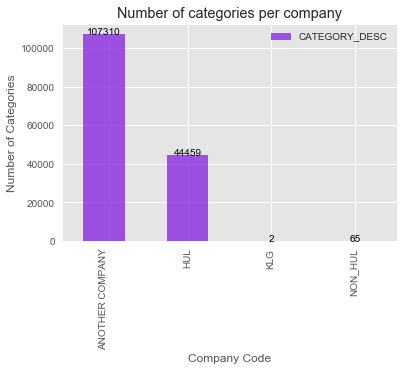

In [114]:
# Plotting the above obtained values on a bar graph

%pylab inline

ax = category_stats.plot(kind='bar',
                   title='Number of categories per company',
                   grid=True,
                   legend=True,
                   alpha=0.8,
                   color="blueviolet")
for i in range(0,len(category_stats)):
    ax.text(i, category_stats.iloc[i], category_stats.iloc[i], color='black',ha='center')

ax.set(xlabel="Company Code", ylabel="Number of Categories")

#### The above analysis tell us that The products whose company is unknown and were grouped in one category were the maximum followed by HUL company products

In [115]:
# Removing KLG and NON_HUL category as they didn't contribute significantly to the analysis
# and these values were lying in the critical region in the positively skewed graph
category_stats = category_stats.drop(['KLG','NON_HUL'])

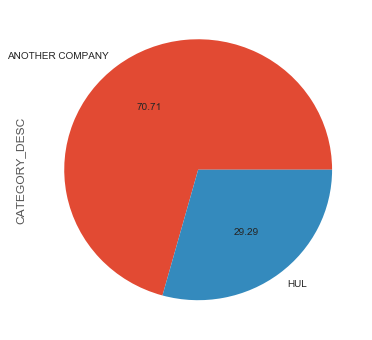

In [116]:
category_stats.plot.pie(autopct='%.2f',figsize=(6,6))

In [117]:
# Grouping the data for four different comapnies in four different variables
def get_data_by_company_code(data,company_code):
    return data[data['COMPANY_CODE'] == company_code].groupby('COMPANY_CODE')

In [118]:
only_hul_products = get_data_by_company_code(store_raw,'HUL')
only_non_hul_products = get_data_by_company_code(store_raw,'NON_HUL')
only_klg_products = get_data_by_company_code(store_raw,'KLG')
only_another_company_products = get_data_by_company_code(store_raw,'ANOTHER COMPANY')

In [119]:
# Top 10 data values of HUL
only_hul_products.head(10)

,COMPANY_CODE,CATEGORY_DESC,SUBCATEGORY_DESC,BRAND_DESC,BASEPACK,BASEPACK_DESC,BARCODE
0,HUL,PFW,Washing Powder,Rin,16040,RIN ADVANCED POWDER NM 4 Kg,8901030648229
1,HUL,PFW,Washing Powder,Rin,16207,RIN ADVANCED POWDER MOGRA NM 4 Kg,8901030648250
2,HUL,CPD,Instant Noodles,Knorr,80759,KNR DRY NOODLES - CHINESE HOT N SPICY,8901030649868
3,HUL,CPD,Instant Noodles,Knorr,80758,KNR DRY NOODLES - CHINESE SCHEZWAN,8901030657627
4,HUL,MPW,Personal Wash Bars,Lifebuoy,15194,LIFEBUOY TOTA10 125g MP,8901030653742
5,HUL,PPW,Personal Wash Bars,PEARS,17336,PEARS PURE AND GENTLE SOAP 3*75G AMBER,8901030652080
6,HUL,CPD,Instant Noodles,Knorr,80758,KNR DRY NOODLES - CHINESE SCHEZWAN,8901030649837
7,HUL,Skin,Fairness,Ponds,12682,Ponds WB Daily Lightening Cream 35 gms,8901030638084
8,HUL,CPD,Ketchup-Sauces,Kissan,80456,Kissan Ketchup -Sweet & Spicy 500Gms,8901030650574
9,HUL,Oral,Toothpaste,Pepsodent,10075,Pepsodent G TP Tube 150g,8901030651144


In [120]:
# Grouping the data by the number of categories for all the companies
category = category_per_company['CATEGORY_DESC'].value_counts()
category.loc['HUL'].head(10)

CATEGORY_DESC
Hair      6709
PFW       4687
Skin      4228
Tea       4220
HUL 3     4103
MFW       2984
CPD       2873
PPW       2813
Coffee    2097
Others    1733
Name: CATEGORY_DESC, dtype: int64

[<matplotlib.text.Text at 0x239b4eb8>, <matplotlib.text.Text at 0x239fae10>]

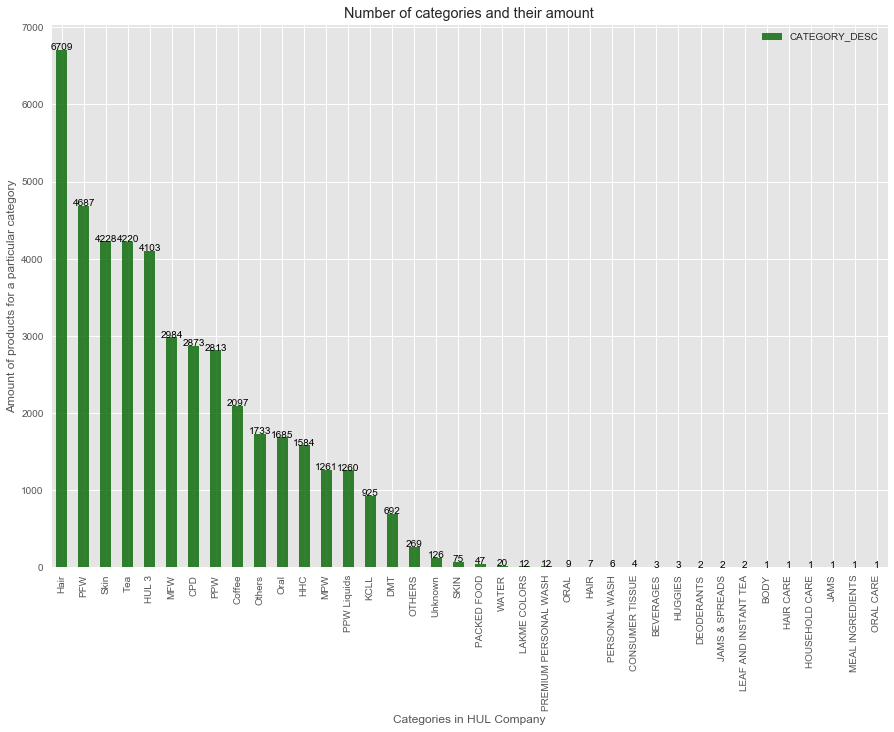

In [121]:
# Plotting the frequency of the categories in the HUL Company
ax = category.loc['HUL'].plot(kind='bar',
                   title='Number of categories and their amount',
                   grid=True,
                   legend=True,
                   figsize=(15,10),
                   alpha=0.8,
                   color="darkgreen")
for i in range(0,len(category.loc['HUL'])):
    ax.text(i, category.loc['HUL'].iloc[i], category.loc['HUL'].iloc[i], color='black',ha='center')

ax.set(xlabel="Categories in HUL Company", ylabel="Amount of products for a particular category")

#### The above analysis tells us that products having "Hair" category is sold maximum for HUL which greatly increases the revenue. It also tells us that people are more involved in hair body products such as Hair, Skin etc. which is bought maximum.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000023BC1A58>], dtype=object)

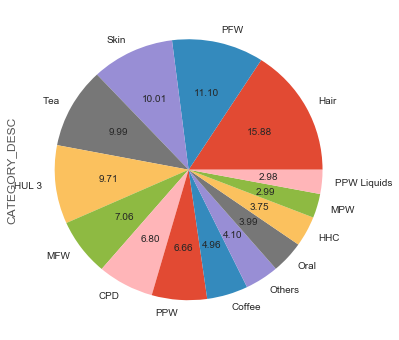

In [122]:
# Plotting the same data in terms of frequency and ignoring the values below the mean of all the values of HUL Company
hul = category.loc['HUL'][category.loc['HUL'] > category.loc['HUL'].mean()]              
hul.plot.pie(subplots = True, autopct='%.2f', figsize=(6,6))

[<matplotlib.text.Text at 0x2427f320>, <matplotlib.text.Text at 0x23bf2630>]

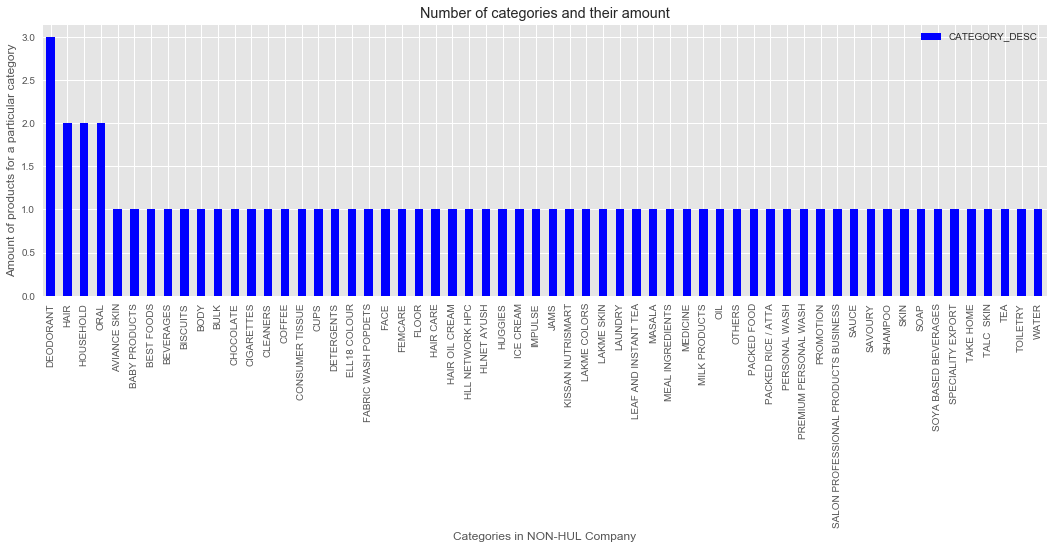

In [123]:
# Plotting the frequency of the categories in the NON_HUL Company
ax = category.loc['NON_HUL'].plot(kind='bar',
                   title='Number of categories and their amount',
                   grid=True,
                   legend=True,
                   figsize=(18,5),
                   color="blue")
ax.set(xlabel="Categories in NON-HUL Company", ylabel="Amount of products for a particular category")

[<matplotlib.text.Text at 0x22031828>, <matplotlib.text.Text at 0x23638748>]

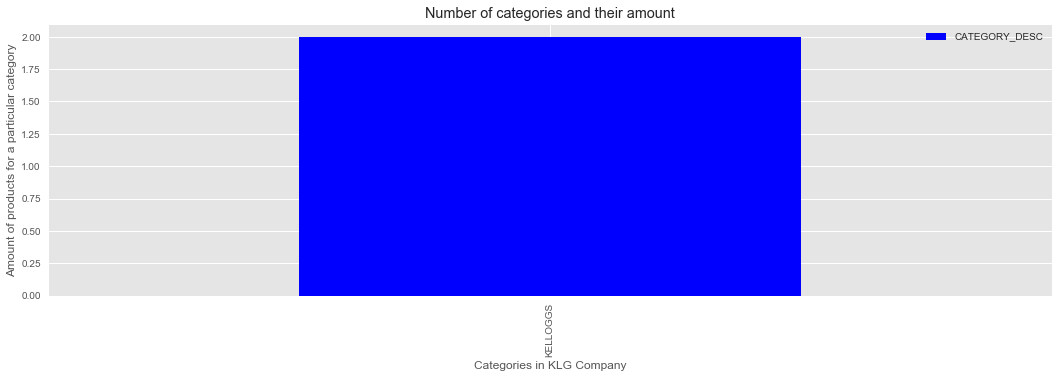

In [124]:
# Plotting the frequency of the categories in the KLG Company
ax = category.loc['KLG'].plot(kind='bar',
                   title='Number of categories and their amount',
                   grid=True,
                   legend=True,
                   figsize=(18,5),
                   color="blue")
ax.set(xlabel="Categories in KLG Company", ylabel="Amount of products for a particular category")

#### The above analysis is insignificant as only one category is in KLG Company as per the data acquired and that value is also really low in number

[<matplotlib.text.Text at 0x22322a58>, <matplotlib.text.Text at 0x24aa5ac8>]

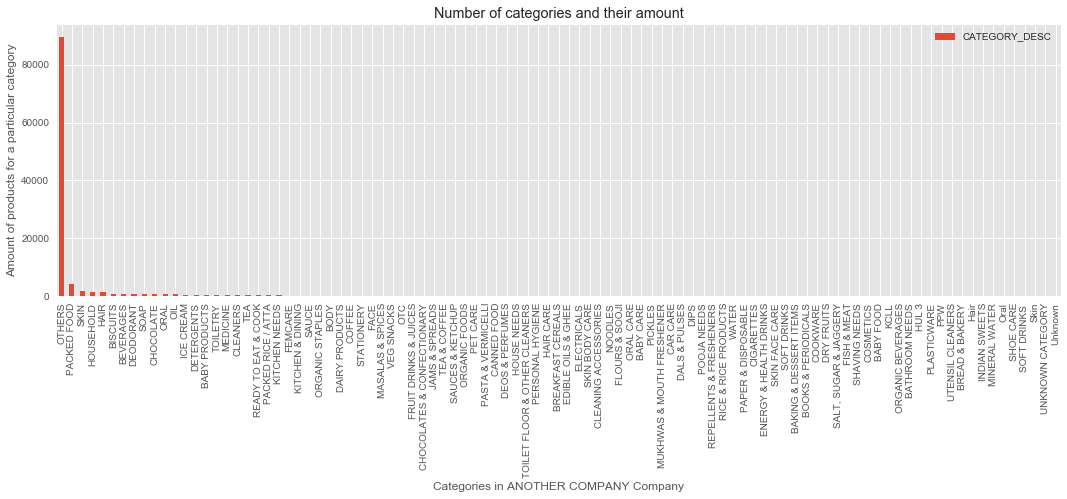

In [125]:
ax = category.loc['ANOTHER COMPANY'].plot(kind='bar',
                   title='Number of categories and their amount',
                   grid=True,
                   legend=True,
                   figsize=(18,5))
ax.set(xlabel="Categories in ANOTHER COMPANY Company", ylabel="Amount of products for a particular category")

#### In the above graph for manually created ANOTHER COMPANY Category, OTHERS category is acting as an outlier and therefore disrupting our analysis. Therefore we need to remove this outlier and then analyze our graph

[<matplotlib.text.Text at 0x22c3c1d0>, <matplotlib.text.Text at 0x22bfbdd8>]

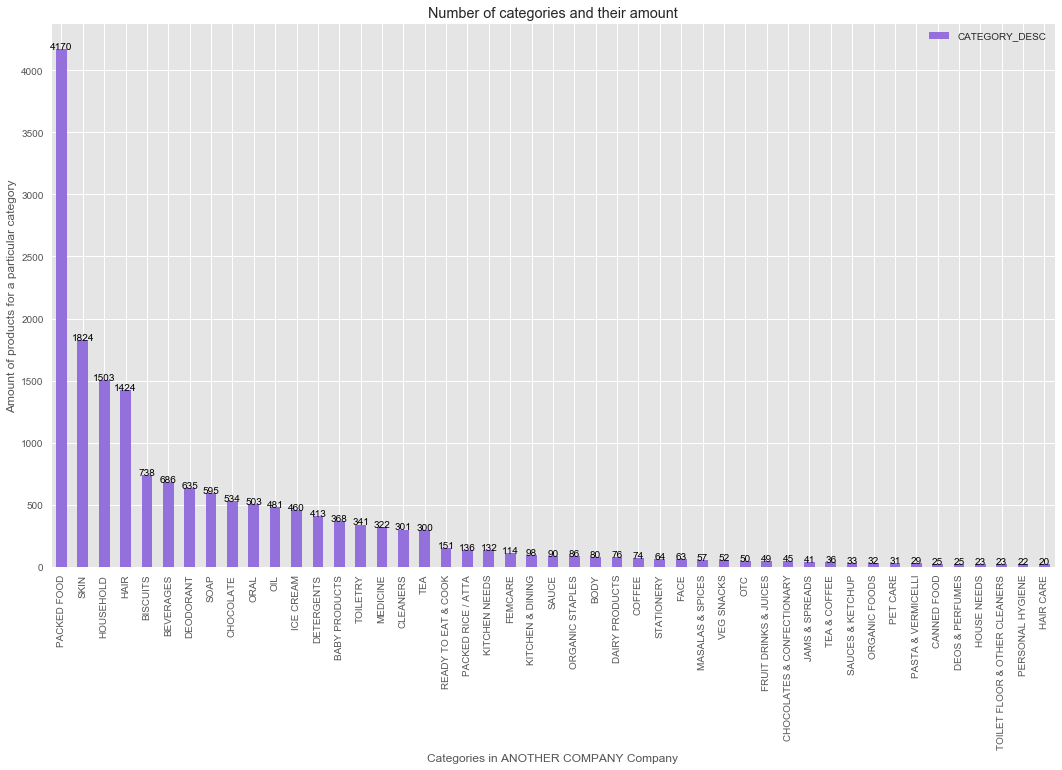

In [127]:
# Removing the above outlier by taking values above the median of all values
another_company_category = category.loc['ANOTHER COMPANY'][category.loc['ANOTHER COMPANY'] > category.loc['ANOTHER COMPANY'].median()]    # Considering median instead of mean as it gets us a middle value through which appropriate graph is shown
another_company_category = another_company_category[another_company_category < category.loc['ANOTHER COMPANY'].max()]                        # The max value disrupts the graph, therefore ignoring an outlier as a max value

ax = another_company_category.plot(kind='bar',
                   title='Number of categories and their amount',
                   grid=True,
                   legend=True,
                   figsize=(18,10),
                   color="mediumpurple")
for i in range(0,len(another_company_category)):
    ax.text(i, another_company_category.iloc[i], another_company_category.iloc[i], color='black',ha='center')

ax.set(xlabel="Categories in ANOTHER COMPANY Company", ylabel="Amount of products for a particular category")


#### The above analysis tells us that the combined category of ANOTHER COMPANY has sold maximum products of packed food, skin and household items which contribute significantly for their revenue but they need to focus on the sales of the products such as Hair care, Personal Hygiene, Bosy which performed really well for HUL Category

In [128]:
# Computing the brands sold for each subcategory of products
brand_per_subcategory = store_raw.groupby(['SUBCATEGORY_DESC'])['BRAND_DESC'].count()
brand_per_subcategory

SUBCATEGORY_DESC
                                  1
ADULT DIAPERS                     7
AFTER SHAVE                      57
AGARBATTI                       133
ALL PURPOSE CLEANERS             11
ALMONDS                          15
ALUMINIUM FOIL & CLING WRAP      33
ANALGESICS                       58
ANTACIDS                         21
ANTISEPTICS                      24
APPALAM                           6
AVALAKKI/POHA                    13
AVIANCE SKIN                      1
After Shave Lotion               47
Anti Ageing                      70
Atta                            109
BABY CARE ACCESSORIES            35
BABY CEREAL                      29
BABY CREAMS & LOTION             28
BABY OIL & SHAMPOOS              34
BABY POWDER                      20
BABY PRODUCTS                     1
BABY SOAP                        31
BAKEWARE                          6
BAKING INGREDIENTS               23
BASMATI RICE                    112
BATTERY                          83
BESAN      

In [129]:
# Showing the unique products sold in each subcategory
u_brand_per_subcategory = store_raw.groupby(['SUBCATEGORY_DESC'])['BRAND_DESC'].unique()
u_brand_per_subcategory

SUBCATEGORY_DESC
                                                                       [PREMIER]
ADULT DIAPERS                                      [FEEL FREE, KARE IN, FRIENDS]
AFTER SHAVE                    [VI-JOHN, PARK AVENUE, OLD SPICE, NIVEA, GILLE...
AGARBATTI                      [MOKSH, CYCLE, OTHERS, MANGALDEEP, SNAKE BRAND...
ALL PURPOSE CLEANERS           [TRISHUL, JEYES, OTHERS, COLIN, PREMIER, SCOTC...
ALMONDS                        [SAPPHIRE, TULSI, RAMU, nan, DCC, NOURISH ORGA...
ALUMINIUM FOIL & CLING WRAP    [NUTRIWRAP, KITCHENMATE, PAL, HINDALCO, HOME F...
ANALGESICS                     [NEXCARE, ORTHO, MOOV, MEFTAL-P, VOLITRA, ZAND...
ANTACIDS                       [ENO, OTHERS, CREMAFFIN, DIGENE, GELUSIL, PUDI...
ANTISEPTICS                    [BOROLINE, HIMAMI, BOROLINES SUTHOL, SUTHOL, D...
APPALAM                                                                 [AMBIKA]
AVALAKKI/POHA                  [DOUBLE HORSE, TUNCH POHA, AHAAR, KEPLER, MOTH...
AVIANCE SKI

In [130]:
# Types of brands sold under "Washing powder" subcategory
u_brand_per_subcategory['Washing Powder']

array([u'Rin', u'Wheel', u'Surf Excel', u'Sunlight', u'Ok'], dtype=object)

In [131]:
# Computing the amount of products of each brand in each subcategory for the analysis
pro_brand_subcategory = store_raw.groupby(['SUBCATEGORY_DESC','BRAND_DESC'])['BRAND_DESC'].count()
pro_brand_subcategory

SUBCATEGORY_DESC  BRAND_DESC       
                  PREMIER                 1
ADULT DIAPERS     FEEL FREE               2
                  FRIENDS                 3
                  KARE IN                 2
AFTER SHAVE       BIOTIQUE                1
                  COBRA                   1
                  GATSBY                  4
                  GILLETTE               10
                  NIVEA                   8
                  OLD SPICE              23
                  PARK AVENUE             3
                  VI-JOHN                 2
                  WILD STONE              1
                  YARDLEY                 4
AGARBATTI         AMRUTHA                 6
                  AVIG CHAMPA             1
                  CYCLE                  36
                  ECO                     1
                  HARI DARSHAN            7
                  HEM                    15
                  MANGALDEEP             22
                  MAYA                  

[<matplotlib.text.Text at 0x234d30b8>, <matplotlib.text.Text at 0x223e5cc0>]

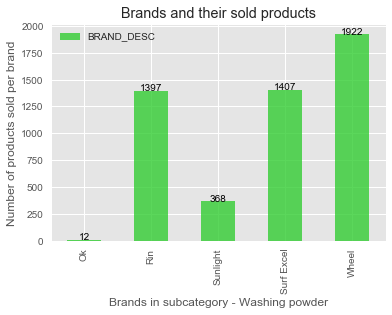

In [132]:
ax = pro_brand_subcategory.loc['Washing Powder'].plot(kind='bar',
                   title='Brands and their sold products',
                   grid=True,
                   legend=True,
                   alpha=0.8,
                   color="limegreen")
for i in range(0,len(pro_brand_subcategory.loc['Washing Powder'])):
    ax.text(i, pro_brand_subcategory.loc['Washing Powder'].iloc[i], pro_brand_subcategory.loc['Washing Powder'].iloc[i], color='black',ha='center')

ax.set(xlabel="Brands in subcategory - Washing powder", ylabel="Number of products sold per brand")

#### The above graph tells us, Most preferred product is Wheel and the least preferred product is Ok in Washing powder category

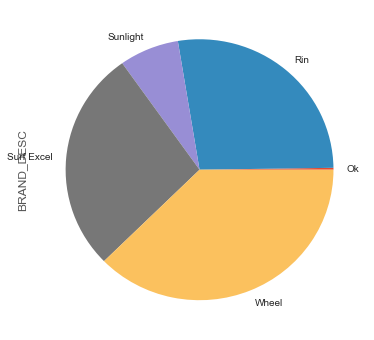

In [133]:
pro_brand_subcategory.loc['Washing Powder'].plot(kind='pie',figsize=(6,6))

In [91]:
# Giving results for How many subcategories in a company per category
sub_company_category = store_raw.groupby(['COMPANY_CODE','CATEGORY_DESC'])['SUBCATEGORY_DESC'].count()
sub_company_category

COMPANY_CODE     CATEGORY_DESC                       
ANOTHER COMPANY  BABY CARE                                13
                 BABY FOOD                                 3
                 BABY PRODUCTS                           368
                 BAKING & DESSERT ITEMS                    7
                 BATHROOM NEEDS                            2
                 BEVERAGES                               686
                 BISCUITS                                738
                 BODY                                     80
                 BOOKS & PERIODICALS                       7
                 BREAD & BAKERY                            1
                 BREAKFAST CEREALS                        19
                 CANNED FOOD                              25
                 CAR CARE                                 11
                 CHOCOLATE                               534
                 CHOCOLATES & CONFECTIONARY               45
                 CIGARETTES    

In [93]:
# Computing the above given results for ANOTHER COMPANY
# Removing the maximum value from analysis as it is acting as an outlier
ana_sub_company_category = sub_company_category['ANOTHER COMPANY'][sub_company_category['ANOTHER COMPANY'] < sub_company_category['ANOTHER COMPANY'].max()]        ### Removing others as it was an outlier
# Filtering the results i n terms of median of the values
ana_sub_company_category = ana_sub_company_category[ana_sub_company_category > sub_company_category['ANOTHER COMPANY'].median()]     # Mean was really large therefore median is considered
ana_sub_company_category

CATEGORY_DESC
BABY PRODUCTS                     368
BEVERAGES                         686
BISCUITS                          738
BODY                               80
CANNED FOOD                        25
CHOCOLATE                         534
CHOCOLATES & CONFECTIONARY         45
CLEANERS                          301
COFFEE                             74
DAIRY PRODUCTS                     76
DEODORANT                         635
DEOS & PERFUMES                    25
DETERGENTS                        413
FACE                               63
FEMCARE                           114
FRUIT DRINKS & JUICES              49
HAIR                             1424
HAIR CARE                          20
HOUSE NEEDS                        23
HOUSEHOLD                        1503
ICE CREAM                         460
JAMS & SPREADS                     41
KITCHEN & DINING                   98
KITCHEN NEEDS                     132
MASALAS & SPICES                   57
MEDICINE                          32

[<matplotlib.text.Text at 0x2386f588>, <matplotlib.text.Text at 0x2385d978>]

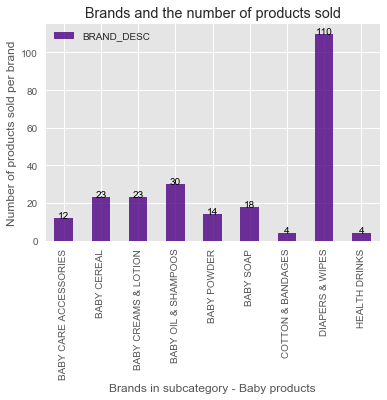

In [134]:
# Just like above, Computing the brands in a category per subcategory
bra_category_sub = store_raw.groupby(['CATEGORY_DESC','SUBCATEGORY_DESC'])['BRAND_DESC'].count()

# Just for the analysis, considering Baby Products in the analysis.
graph = bra_category_sub.loc['BABY PRODUCTS']
graph = graph[graph > graph.median()]

ax = graph.plot(kind='bar',
               title='Brands and the number of products sold',
               grid=True,
               legend=True,
               alpha=0.8,
               color="indigo")
for i in range(0,len(graph)):
    ax.text(i, graph.iloc[i], graph.iloc[i], color='black',ha='center')

ax.set(xlabel="Brands in subcategory - Baby products", ylabel="Number of products sold per brand")

#### The above analysis tells us that in Baby Products, Diapers and Wipes are sold the maximum followed by Baby Oil and Shampoo and the least sellung product is Cotton Bandages as well as Health Drinks.

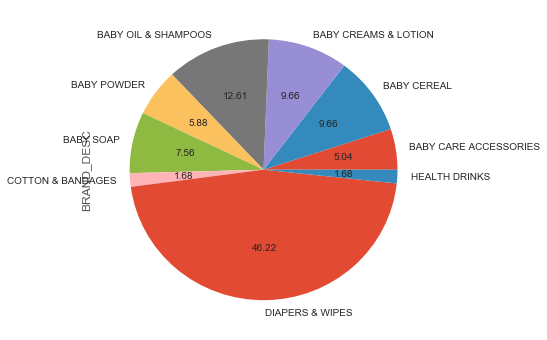

In [96]:
graph.plot.pie(autopct='%.2f',figsize=(6,6))

 #### Below is the analysis of which product in Diapers and Wipes performed the best.

[<matplotlib.text.Text at 0x231dfc50>, <matplotlib.text.Text at 0x237ec080>]

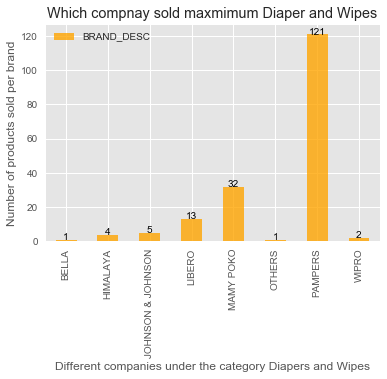

In [135]:
# Now among Diapers and Wipes, analyzing which product is in top for maximum sales
ax = pro_brand_subcategory.loc['DIAPERS & WIPES'].plot(kind='bar',
               title='Which compnay sold maxmimum Diaper and Wipes',
               grid=True,
               legend=True,
               alpha=0.8,
               color="orange")

for i in range(0,len(pro_brand_subcategory.loc['DIAPERS & WIPES'])):
    ax.text(i, pro_brand_subcategory.loc['DIAPERS & WIPES'].iloc[i], pro_brand_subcategory.loc['DIAPERS & WIPES'].iloc[i], color='black',ha='center')

ax.set(xlabel="Different companies under the category Diapers and Wipes", ylabel="Number of products sold per brand")

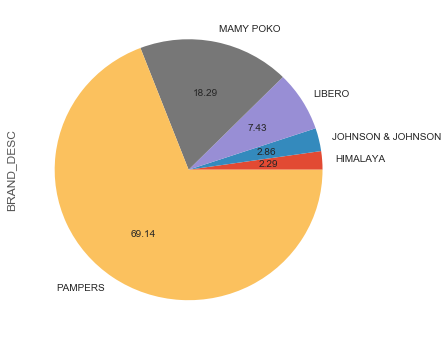

In [140]:
piechar = pro_brand_subcategory.loc['DIAPERS & WIPES'][pro_brand_subcategory.loc['DIAPERS & WIPES'] > 2]
piechar.plot.pie(autopct='%.2f',figsize=(6,6))

#### The above analysis tells us that In Diapers and Wipes, Pampers performed the best followed by Mammy Poko and the least sold product is Bella.

# Conclusion

### Which company has maximum products, maximum subcategories, maximum sales, maximum sold products per subcategory etc.

#### Ignoring ANOTHER COMPANY as computed, which company ahs maximum products?
As computed in the beginning, HUL Has maximum products with various categories involved in it.

#### In HUL, which category has the maximum number of products sold?
In HUL, **Hair** Category followed by **PFW** and **Skin** sold the maximum number of products

#### Which brand in Washing Powder subcategory, performed best irrespective of company?
Overall, **Wheel** performed best in all Washing powder brands


### Limitations:

The dataset doesn't have any numerical data which could have played a significant role in determing many different factors and doing various statistical tests such as Z test, t test, ANOVA etc. but due to the inabsence of numerical data, we couldn't utilize mostly used tools of statistics.